<a href="https://colab.research.google.com/github/mickee00000/Research_Internship/blob/main/201951090_Summer_Research_Internship_Project_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow import keras
import PIL
import cv2

In [ ]:
import pathlib
import os
import sys

In [ ]:
import requests

In [ ]:
url = 'https://raw.githubusercontent.com/mickee00000/Research_Internship/main/part1.jpeg'
r = requests.get(url, allow_redirects=True)
open('part1.jpeg', 'wb').write(r.content)

94205

In [ ]:
hindi_data = tf.keras.utils.get_file('hindi_text', origin = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip', cache_dir='.', extract=True, archive_format='zip')
hindi_data

80429056/80417803 [==============================] - 5s 0us/step


'./datasets/hindi_text'

In [ ]:
hindi_data_train = pathlib.Path(r'/content/datasets/DevanagariHandwrittenCharacterDataset/Train')
hindi_data_train

PosixPath('/content/datasets/DevanagariHandwrittenCharacterDataset/Train')

In [ ]:
hindi_data_test = pathlib.Path(r'/content/datasets/DevanagariHandwrittenCharacterDataset/Test')
hindi_data_test

PosixPath('/content/datasets/DevanagariHandwrittenCharacterDataset/Test')

In [ ]:
image_count = len(list(hindi_data_train.glob('*/*.png')))
image_count

78200

In [ ]:
len(list(hindi_data_train.glob('character_3_ga/*')))

1700

In [ ]:
hindi_letters_dict_train = {
    'sa': list(hindi_data_train.glob('character_32_patalosaw/*')),
    're': list(hindi_data_train.glob('character_27_ra/*')),
    'ga': list(hindi_data_train.glob('character_3_ga/*')),
    'ma': list(hindi_data_train.glob('character_25_ma/*')),
    'pa': list(hindi_data_train.glob('character_21_pa/*')),
    'dha': list(hindi_data_train.glob('character_19_dha/*')),
    'ni': list(hindi_data_train.glob('character_20_na/*')),
    'zero': list(hindi_data_train.glob('digit_0/*')),
    'one': list(hindi_data_train.glob('digit_1/*')),
    'two': list(hindi_data_train.glob('digit_2/*')),
    'three': list(hindi_data_train.glob('digit_3/*')),
    'four': list(hindi_data_train.glob('digit_4/*')),
    'five': list(hindi_data_train.glob('digit_5/*')),
    'six': list(hindi_data_train.glob('digit_6/*')),
    'seven': list(hindi_data_train.glob('digit_7/*')),
    'eight': list(hindi_data_train.glob('digit_8/*')),
    'nine': list(hindi_data_train.glob('digit_9/*')),
}

In [ ]:
hindi_letters_dict_test = {
    'sa': list(hindi_data_test.glob('character_32_patalosaw/*')),
    're': list(hindi_data_test.glob('character_27_ra/*')),
    'ga': list(hindi_data_test.glob('character_3_ga/*')),
    'ma': list(hindi_data_test.glob('character_25_ma/*')),
    'pa': list(hindi_data_test.glob('character_21_pa/*')),
    'dha': list(hindi_data_test.glob('character_19_dha/*')),
    'ni': list(hindi_data_test.glob('character_20_na/*')),
    'zero': list(hindi_data_test.glob('digit_0/*')),
    'one': list(hindi_data_test.glob('digit_1/*')),
    'two': list(hindi_data_test.glob('digit_2/*')),
    'three': list(hindi_data_test.glob('digit_3/*')),
    'four': list(hindi_data_test.glob('digit_4/*')),
    'five': list(hindi_data_test.glob('digit_5/*')),
    'six': list(hindi_data_test.glob('digit_6/*')),
    'seven': list(hindi_data_test.glob('digit_7/*')),
    'eight': list(hindi_data_test.glob('digit_8/*')),
    'nine': list(hindi_data_test.glob('digit_9/*')),
}

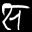

In [ ]:
PIL.Image.open(hindi_letters_dict_train['sa'][0])

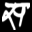

In [ ]:
PIL.Image.open(hindi_letters_dict_train['sa'][5])

In [ ]:
hindi_label_dict = {
    'sa': 10,
    're': 11,
    'ga': 12,
    'ma': 13,
    'pa': 14,
    'dha': 15,
    'ni': 16,
    'zero': 0,
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
}

In [ ]:
hindi_name_dict = {
     10: 'sa',
     11: 're',
     12: 'ga',
     13: 'ma',
     14: 'pa',
     15: 'dha',
     16: 'ni',
     0: 'zero',
     1: 'one',
     2: 'two',
     3: 'three',
     4: 'four',
     5: 'five',
     6: 'six',
     7: 'seven',
     8: 'eight',
     9: 'nine',
}

In [ ]:
img = cv2.imread(str(hindi_letters_dict_train['re'][0]))


In [ ]:
img

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [165, 165, 165],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [ ]:
X_train = []
y_train = []

In [ ]:
for key, value_list in hindi_letters_dict_train.items():
    for value in value_list:
        img = cv2.imread(str(value))
        img = cv2.resize(img,(32,32))
        _, img = cv2.threshold(img, 127,255, cv2.THRESH_BINARY_INV)
        X_train.append(img)
        y_train.append(hindi_label_dict[key])

In [ ]:
X_test = []
y_test = []

In [ ]:
for key, value_list in hindi_letters_dict_test.items():
    for value in value_list:
        img = cv2.imread(str(value))
        img = cv2.resize(img,(32,32))
        _, img = cv2.threshold(img, 127,255, cv2.THRESH_BINARY_INV)
        X_test.append(img)
        y_test.append(hindi_label_dict[key])

In [ ]:
len(X_train)

28900

In [ ]:
len(y_train)

28900

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
X_train.shape

(28900, 32, 32, 3)

In [ ]:
X_test.shape

(5100, 32, 32, 3)

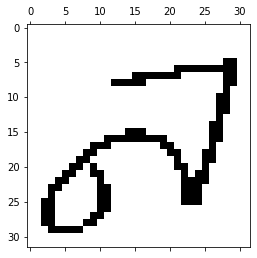

In [ ]:
plt.matshow(X_train[11110])

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
hindi_name_dict[y_train[11110]]

'ni'

In [ ]:
X_train_scaled.shape

(28900, 32, 32, 3)

In [ ]:
#X_train_scaled_flat = np.reshape(#X_train_scaled, (28900, 32*32*3))

In [ ]:
y_train[0]

10

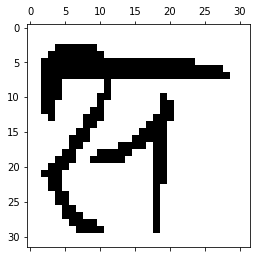

In [ ]:
plt.matshow(X_train[0])

In [ ]:
data_augmentation = keras.Sequential(
    [
        keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(32,32,3)),
        keras.layers.experimental.preprocessing.RandomRotation(0.2),
        keras.layers.experimental.preprocessing.RandomZoom(0.1),
      
    ]
)

In [ ]:
model = keras.Sequential([
    data_augmentation,
    

    keras.layers.Conv2D(filters = 32,kernel_size = (3,3),strides = 1,activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="same"),

    keras.layers.Conv2D(filters = 32,kernel_size = (3,3),strides = 1,activation = "relu",),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="same"),

    keras.layers.Conv2D(filters = 64,kernel_size = (3,3),strides = 1,activation = "relu",),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="same"),

    keras.layers.Conv2D(filters = 64,kernel_size = (3,3),strides = 1,activation = "relu",),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="same"),
    keras.layers.Flatten(),


    keras.layers.Dense(128, activation = "relu", kernel_initializer = "uniform"),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(64, activation = "relu", kernel_initializer = "uniform"),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(17,activation = "softmax"),

])

In [ ]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 32)      

In [ ]:
model.fit(X_train_scaled, y_train, epochs = 50)

Epoch 1/50
904/904 [==============================] - 20s 7ms/step - loss: 1.2153 - accuracy: 0.6154
Epoch 2/50
904/904 [==============================] - 6s 7ms/step - loss: 0.5607 - accuracy: 0.8176
Epoch 3/50
904/904 [==============================] - 6s 7ms/step - loss: 0.4118 - accuracy: 0.8649
Epoch 4/50
904/904 [==============================] - 6s 7ms/step - loss: 0.3567 - accuracy: 0.8834
Epoch 5/50
904/904 [==============================] - 6s 7ms/step - loss: 0.3091 - accuracy: 0.8984
Epoch 6/50
904/904 [==============================] - 6s 7ms/step - loss: 0.2787 - accuracy: 0.9083
Epoch 7/50
904/904 [==============================] - 6s 7ms/step - loss: 0.2549 - accuracy: 0.9176
Epoch 8/50
904/904 [==============================] - 6s 7ms/step - loss: 0.2530 - accuracy: 0.9197
Epoch 9/50
904/904 [==============================] - 6s 7ms/step - loss: 0.2181 - accuracy: 0.9299
Epoch 10/50
904/904 [==============================] - 6s 7ms/step - loss: 0.2050 - accuracy: 0.935

In [ ]:
model.evaluate(X_test_scaled, y_test)

160/160 [==============================] - 1s 4ms/step - loss: 0.0894 - accuracy: 0.9722


[0.08943650871515274, 0.9721568822860718]

In [ ]:
model = keras.Sequential([
    data_augmentation,
    

    keras.layers.Conv2D(filters = 32,kernel_size = (3,3),strides = 1,activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="same"),

    keras.layers.Conv2D(filters = 32,kernel_size = (3,3),strides = 1,activation = "relu",),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="same"),

    keras.layers.Conv2D(filters = 64,kernel_size = (3,3),strides = 1,activation = "relu",),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="same"),

    keras.layers.Conv2D(filters = 64,kernel_size = (3,3),strides = 1,activation = "relu",),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="same"),
    keras.layers.Flatten(),


    keras.layers.Dense(128, activation = "relu", kernel_initializer = "uniform"),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(64, activation = "relu", kernel_initializer = "uniform"),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(17,activation = "softmax"),

])

In [ ]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 13, 13, 32)      

In [ ]:
model.fit(X_train_scaled, y_train, epochs = 1)

Epoch 1/50
904/904 [==============================] - 7s 7ms/step - loss: 1.1990 - accuracy: 0.6204
Epoch 2/50
904/904 [==============================] - 6s 7ms/step - loss: 0.5700 - accuracy: 0.8162
Epoch 3/50
904/904 [==============================] - 6s 7ms/step - loss: 0.4172 - accuracy: 0.8638
Epoch 4/50
904/904 [==============================] - 6s 7ms/step - loss: 0.3372 - accuracy: 0.8908
Epoch 5/50
904/904 [==============================] - 6s 7ms/step - loss: 0.3080 - accuracy: 0.8999
Epoch 6/50
904/904 [==============================] - 6s 7ms/step - loss: 0.2734 - accuracy: 0.9084
Epoch 7/50
904/904 [==============================] - 6s 7ms/step - loss: 0.2531 - accuracy: 0.9169
Epoch 8/50
904/904 [==============================] - 6s 7ms/step - loss: 0.2296 - accuracy: 0.9242
Epoch 9/50
904/904 [==============================] - 6s 7ms/step - loss: 0.2255 - accuracy: 0.9266
Epoch 10/50
904/904 [==============================] - 6s 7ms/step - loss: 0.2055 - accuracy: 0.9349

In [ ]:
model.evaluate(X_test_scaled, y_test)

160/160 [==============================] - 1s 3ms/step - loss: 0.0814 - accuracy: 0.9735


[0.08138057589530945, 0.9735293984413147]

In [ ]:
model.predict([X_train_scaled[1]])

ValueError: ignored

In [ ]:
notes = cv2.imread("part1.jpeg")
gray = cv2.cvtColor(notes, cv2.COLOR_BGR2GRAY)

In [ ]:
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

In [ ]:
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

In [ ]:
dilation = cv2.dilate(thresh1, rect_kernel, iterations=1)

In [ ]:
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [ ]:
print(len(contours))

234


In [ ]:
notes2 = notes.copy()

In [ ]:
new_contours = []

In [ ]:
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio_1 = h / w
    aspect_ratio_2 = w / h
    if aspect_ratio_1 < 3 and aspect_ratio_2 < 2 and w > 18 and h > 20:
        new_contours.append(cnt)

In [ ]:
passer = []

In [ ]:
num = 0
for cnt in new_contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cropped = thresh1[y:y + h, x:x + w]
    passer.append(cropped)
    cv2.rectangle(notes, (x-5, y-5), (x + w+5, y + h+5), (0, 0, 255), 2)
    cv2.putText(notes, "{}".format(num + 1), (x + 40, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0, 0, 255), 2)
    num+=1

In [ ]:
passer.reverse()

j = 1 
path= '/tmp/'
for i in passer:
  cv2.imwrite(str(path)+str(j)+'.jpeg', i)
  j+=1


In [ ]:
cv2.imwrite('bounded.jpeg', notes)

True

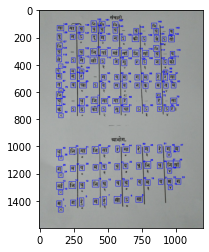

In [ ]:
plt.imshow(notes)
plt.show()